In [0]:
# Fill in your name using the format below and student ID number
your_name = "Mankevic, Karina"
student_id = "1036163"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
!pip3 install --quiet openml 

     |████████████████████████████████| 163kB 3.3MB/s 


In [4]:
# Uncomment the following line to run in Google Colab
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow

sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Karina, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = '/content/drive/My Drive/Web_Info_Retrieval/assignment-3-KarinaMankevic'

In [8]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

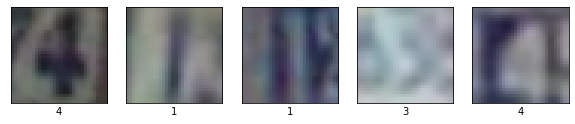

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)


### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233197  0.190545  2.233008      0.190974
max  2.245967  0.190954  2.233106      0.190974


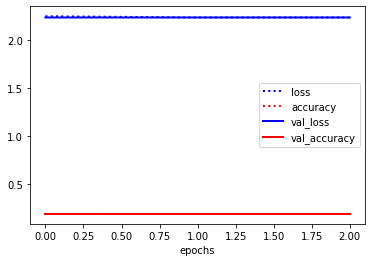

In [15]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233197  0.190545  2.233008      0.190974
max  2.245967  0.190954  2.233106      0.190974


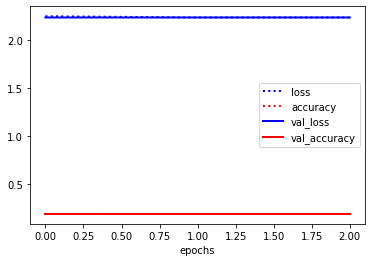

In [16]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 1528)              4695544   
_________________________________________________________________
dense_53 (Dense)             (None, 756)               1155924   
_________________________________________________________________
dense_54 (Dense)             (None, 370)               280090    
_________________________________________________________________
dense_55 (Dense)             (None, 177)               65667     
_________________________________________________________________
dense_56 (Dense)             (None, 80)                14240     
_________________________________________________________________
dense_57 (Dense)     

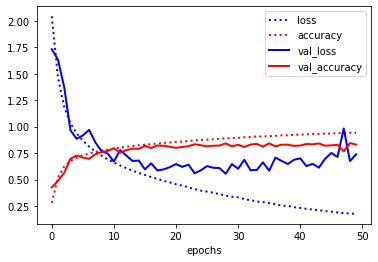

In [30]:
def build_model_1_1():
  # The input layer consists of 3072 neurons
  # Let n:= the number of neurons at the current layer
  # Then, every next layer consists of (n/2-8), except the last layer
  # The last layer consists of 10 neurons, as the network is trained to perform 
  # categorial classification on 10 classes
  model = models.Sequential()
  # input layer:
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  # imtermediate layers:
  # n/2-8: 1528, 756, 370, 177, 80, 32, 10
  model.add(layers.Dense(1528, activation='relu'))
  model.add(layers.Dense(756, activation='relu'))
  model.add(layers.Dense(370, activation='relu'))
  model.add(layers.Dense(177, activation='relu'))
  model.add(layers.Dense(80, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  # output layer:
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_1 = """
I added 6 hidden layers with  ReLU act.funct. as it is fast to compute.
Due to problem's classification nature, the last layer with 10 neurons has softmax act.funct.,
which transforms input into probability for each of the 10 classes,
and categorical crossentropy is used as loss. SGD optimizer performs well here.
Val. accuracy reaches 84%, which is good performance, considering that tuning is not performed.
Val. loss overall decreases. Strong overfitting and no underfitting takes place."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Epoch 1/50
1986/1986 [==============================] - 5s 3ms/step - loss: 2.1727 - accuracy: 0.2264 - val_loss: 1.9922 - val_accuracy: 0.3038
Epoch 2/50
1986/1986 [==============================] - 5s 3ms/step - loss: 1.7529 - accuracy: 0.3941 - val_loss: 1.5372 - val_accuracy: 0.4913
Epoch 3/50
1986/1986 [==============================] - 5s 3ms/step - loss: 1.4042 - accuracy: 0.5443 - val_loss: 1.4077 - val_accuracy: 0.5510
Epoch 4/50
1986/1986 [==============================] - 5s 3ms/step - loss: 1.1989 - accuracy: 0.6243 - val_loss: 1.2037 - val_accuracy: 0.6157
Epoch 5/50
1986/1986 [==============================] - 5s 3ms/step - loss: 1.0780 - accuracy: 0.6662 - val_loss: 1.1293 - val_accuracy: 0.6580
Epoch 6/50
1986/1986 [==============================] - 5s 3ms/step - loss: 0.9892 - accuracy: 0.6924 - val_loss: 1.0474 - val_accuracy: 0.6697
Epoch 7/50
1986/1986 [==============================] - 5s 3ms/step - loss: 0.9252 - accuracy: 0.7121 - val_loss: 0.9

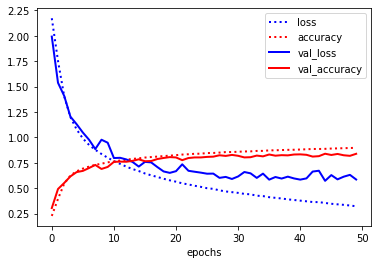

In [31]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  # The input layer consists of 1024 neurons
  # Let n:= the number of neurons at the current layer
  # Then, every next layer consists of (n/2-8), except the last layer
  # The last layer consists of 10 neurons, as the network is trained to perform 
  # categorial classification on 10 classes
  model = models.Sequential()
  # input layer:
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  # imtermediate layers:
  # n/2-8: 504, 244, 114, 49, 17, 10
  model.add(layers.Dense(504, activation='relu'))
  model.add(layers.Dense(244, activation='relu'))
  model.add(layers.Dense(114, activation='relu'))
  model.add(layers.Dense(49, activation='relu'))
  model.add(layers.Dense(17, activation='relu'))
  # output layer:
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_2 = """
With gray scale, the number of input neurons decreases by factor of 3 (1024 instead of 3072).
The number of trainable params is now 674,415 (vs. 6,214,387 in prev. model); this is big difference. Despite it,
the performance is roughly the same. Val. accuracy reaches ~83%, meaning that using gray scale is better: the model trains faster,
while giving almost same performance. It is logical as the net learns digits' shapes, where color does not matter.
Overfitting is decreased and no underfitiing."""

print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_178 (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_149 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_1072 (Dense)           (None, 504)               516600    
_________________________________________________________________
dropout_37 (Dropout)         (None, 504)               0         
_________________________________________________________________
dense_1073 (Dense)           (None, 244)               123220    
_________________________________________________________________
dropout_38 (Dropout)         (None, 244)               0         
_________________________________________________________________
dense_1074 (Dense) 

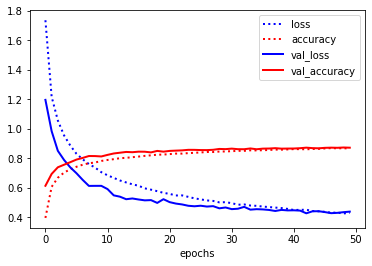

In [21]:
def build_model_1_3():
  model = models.Sequential()
  # input layer:
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  # intermediate layers:
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(504, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(244, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(114, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(49, activation='relu'))
  model.add(layers.Dense(17, activation='relu'))
  # output layer:
  model.add(layers.Dense(10, activation='softmax'))

  sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.1)
  model.compile(optimizer=sgd_opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)
answer_q_1_3 = """
Batch normalizaiton works well in this model, especially when applied right after input layer. This way, 
model's input is normalized, and the model starts performing well already in the first several epochs. Adding several dropout 
layers also works well when 20% of neurons get zeroed-out. Changing learning rate from default(0.01) to 0.1 stimulates faster 
learning. Batch size 64 improves performance. Neither overfit nor underfit is observed. The model is reaching 87% val.accuracy"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)  

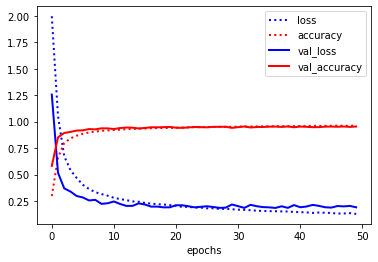

In [22]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu',  input_shape=(32,32,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(64, (3,3),  padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3,3),  padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.1)
  model.compile(optimizer=sgd_opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)
answer_q_2_1 = """
First, I added 3 blocks (2 convolution layers in each, where after each block MaxPooling is applied),
followed by flattening, 1 dense and 1 output layer. In deeper layers, I used increasingly more filters (from 32 to 128),
as it helps preserving info about the input while MaxPooling is descreasing the resolution. With this architecture the model
showed good accuracy, but overfitted. Adding dropout layers, tuning their dropout rates and adding batch normalization between 
convolution layers helped against overfitting. Stochastic Gradient descent optimizer works well with learning rate 0.1 as the net learns faster.
The final model reaches 95% val.accuracy, which is very good. Val.loss overall converges to some value (excl.little spikes), 
neither overfitting not underfitting is observed."""

print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)      

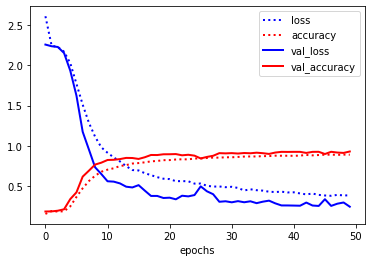

In [23]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
K.clear_session()
tf.executing_eagerly()

train_datagen = ImageDataGenerator(
    zoom_range=0.15,        # Zoom in up to 10%
    zca_whitening=True,    # Set ZCA whitening
)

# Validation data should not be augmented
X_train_gray = rgb2gray(X_train)
X_val_gray = rgb2gray(X_val)
it_train = train_datagen.flow(X_train_gray, y_train, batch_size=256)

augmented_split = it_train, X_val_gray, y_val
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator = True, epochs=50, batch_size=None)
answer_q_2_2 = """
Some augmentations work better than others; e.g, 10% zoom cuts some possibly redundant border info, still performing well.
Setting ZCA whitening also works well. On the other side, flipping, shearing or rotating makes it harder to capture number shape. 
With heigth and width shifting the model does not train. Overall augmentations worsen image quality in this dataset, 
bringing the accuracy down from 95.5% to at most 93%. I left the best combo in ImageGenerator. Over-/under-fit is not observed."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from tensorflow.keras import backend as K
K.clear_session()
tf.executing_eagerly()

classes_list = [str(i) for i in range(1,11)]
model = load_model_from_file(base_dir, "model_2_2")
X_test_gray = rgb2gray(X_test)

# Run predict on test data:

y_pred = model.predict(X_test_gray)
test_accuracy_3_1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  fig.dpi  = 130
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(classes_list)
  ax.set_yticklabels(classes_list)
  ax.set_ylabel('Actual label')
  ax.set_xlabel('Predicted label')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w", fontsize=8)

# Plots misclassificaitons for a given actual label
def plot_misclassifications():
  actual_lbl = 1
  size = 8
  shift = 23

  results = pd.DataFrame({'Actual': np.argmax(y_test, axis=1), 'Predicted':np.argmax(y_pred, axis=1)})
  misclassified_mask = results['Actual'] != results['Predicted']
  actual_mask = results['Actual'] == actual_lbl - 1 
  misclassified_results = results[actual_mask & misclassified_mask]
  misclassified_set_to_show = misclassified_results.index[shift:shift+size]

  # Visualize random misclassifications, together with the predicted and actual class 
  fig, axes = plt.subplots(1, size,  figsize=(size*2, 2))
  fig.suptitle('Misclassifications for label 1 (digit 1)')
  for nr, i in enumerate(misclassified_set_to_show):
    predicted_lbl = results['Predicted'].iloc[i] + 1
    axes[nr].imshow(X_test[i])
    axes[nr].set_xlabel("Predicted label: %s,\n Actual label: %s" % (predicted_lbl,actual_lbl))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())
  plt.show();


print("Accuracy on the training set is {}".format(round(test_accuracy_3_1, 3)))

answer_q_3_1 = """
Digits 8 and 6 are often confused (both ways). Digit 5 is often misclassified as 3 or 6. Digit 1 can be misclassified as 2, 4, 7. Digit 7 is many times misclassified as 1 and 2. Digit 3 is often misclassified as 2, 5 and 8. 

Many confusions are straighformard: the shapes of misclassified digits have some elements in common. 
For example, digit 1 is a vertical bar, which is significant part of digits 2, 4 and 7, causing the confusion between them.
Closer inspection of misclassifications for digit 1 shows that pictures often have background noise (multiple digits together, e.g. '11', '15'). 
Additionally, the quality of pictures is poor. Multiple pictures are blurry and unreadable. 
To sum up, all confusions are based either on common digit shapes, background noise or poor quality."""

print("Answer is {} characters long".format(len(answer_q_3_1)))

Accuracy on the training set is 0.93
Answer is 792 characters long


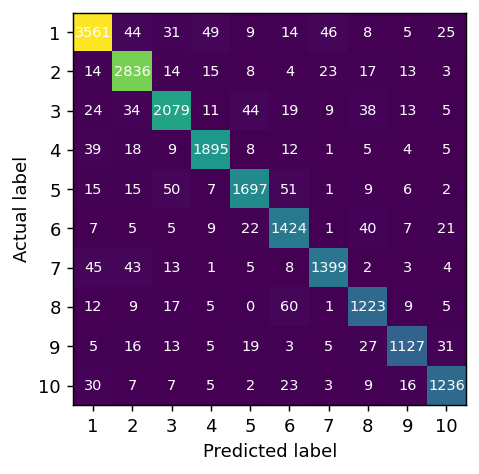

In [25]:
plot_confusion_matrix()

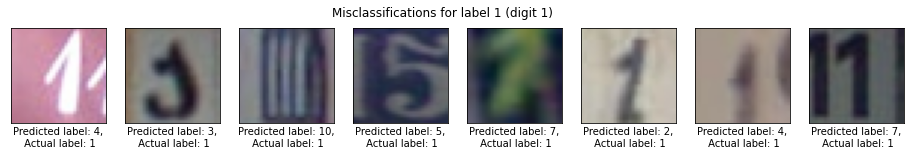

In [26]:
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

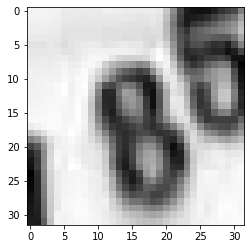

In [27]:
# Retrieve the first picture:
img_tensor = X_test_gray[0] 
# Since the image is gray-scale, we need to adjust the dimention acceptable by imshow function
img_tensor_gray = np.squeeze(img_tensor, axis=2)
# Plot
plt.imshow(img_tensor_gray, cmap="gray");
y_test[0] #Predicted label is 8. 

In [37]:
from tensorflow.keras import models
# from tensorflow.keras import backend as K
# K.clear_session()
# tf.executing_eagerly()

images_per_row = 16

model = load_model_from_file(base_dir, 'model_2_2')
# Retrieve the first picture:
img_tensor = X_test_gray[0] 
img_tensor = np.expand_dims(img_tensor, axis=0) 
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

def plot_activations():
  plot_layer_activations(0, activations)
  plot_layer_activations(2, activations)
  plot_layer_activations(6, activations)
  plot_layer_activations(8, activations)
  plot_layer_activations(12, activations)
  plot_layer_activations(14, activations)

def plot_layer_activations(layer_index, activations):
  start = layer_index
  end = layer_index+1
  # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

answer_q_3_2 = """
In conv2d_1 layer all filters respond to both digits on the original picture ('85'), creating additional noise and interpreted as '85' or '86'. 
Despite it, in conv2d_2 layer, some filters produce output with focus only on the shape of '8', meaning that the model is actually somehow learning the correct shape. 
Many filters here respond to 2 circles the digit 8 is made of.
Outputs of all next conv.layers become hard to interpret as the resolution decreases and abstraction increases."""

print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 488 characters long


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


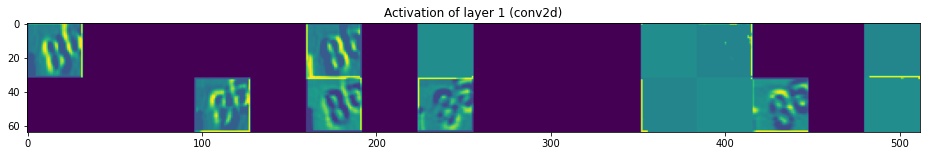

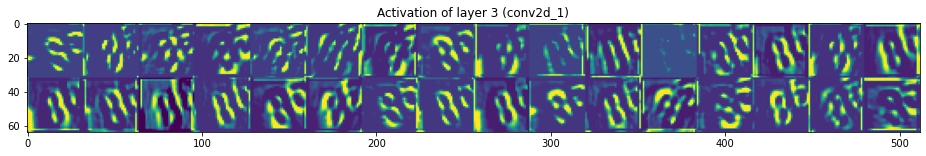

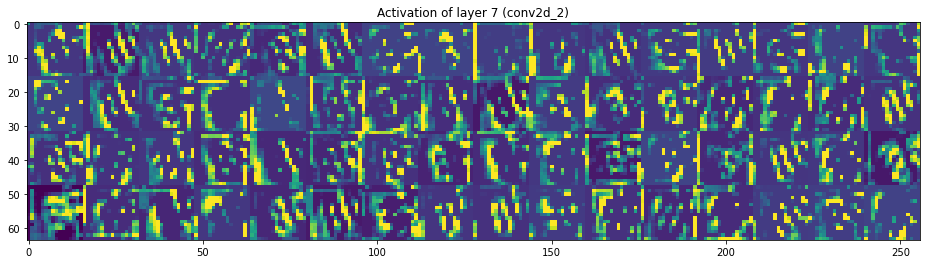

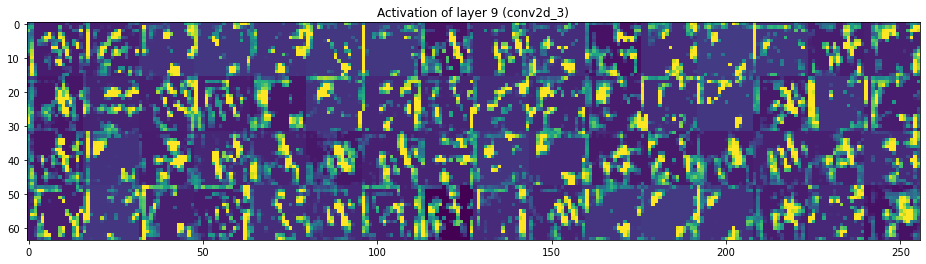

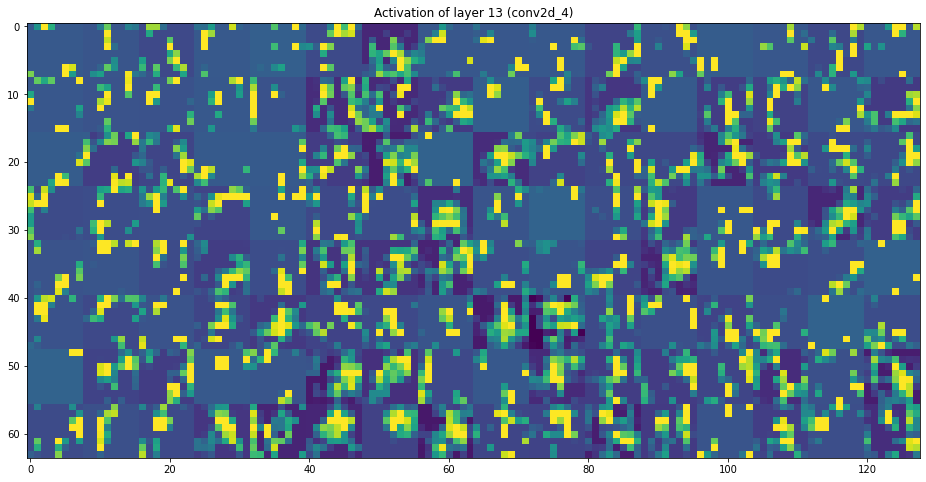

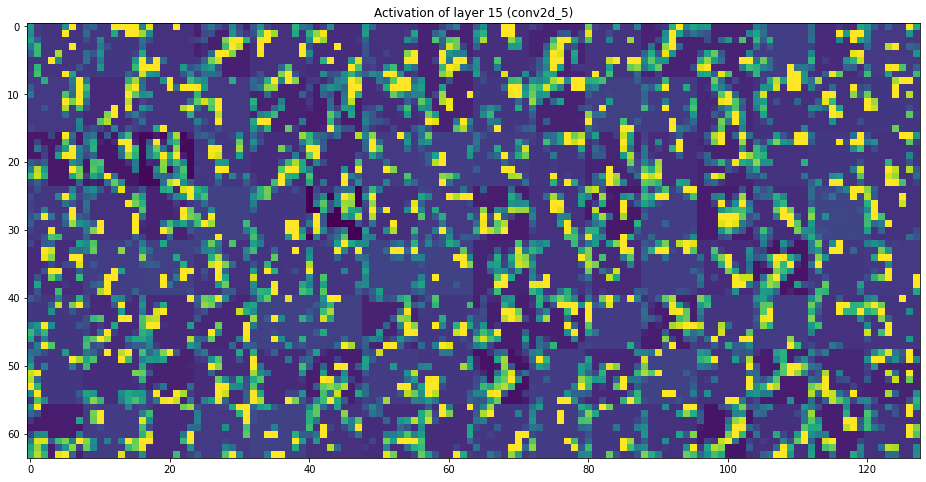

In [29]:
plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2
tf.compat.v1.disable_eager_execution()

def plot_activation_map():
  image_id = 0
  K.clear_session()
  model = load_model_from_file(base_dir, 'model_2_2')
  # Retrieve the picture: 
  img_tensor_gray = X_test_gray[image_id]
  x = np.expand_dims(img_tensor_gray, axis=0) 
  
  predict_class_index = np.argmax(y_pred[image_id])
  actual_class_index = np.argmax(y_test[image_id])
  print("Predicted class: {}, Actual class: {}".format(predict_class_index + 1, actual_class_index + 1))

  image_output = model.output[:,predict_class_index]

  # There is the output feature map of the conv layer,
  # the last convolutional layer in VGG16
  last_conv_layer = model.get_layer('conv2d_5')  

  # This is the gradient of the class with regard to
  # the output feature map of `block5_conv3`
  grads = K.gradients(image_output, last_conv_layer.output)[0]

  # This is a vector, where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of last conv. layer,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image
  pooled_grads_value, conv_layer_output_value = iterate([x])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the class
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1)

  preds = model.predict(x)

  heatmap = np.maximum(heatmap, 0) #avoid negative values
  if np.max(heatmap) > 0:
    heatmap /=  np.max(heatmap)

  # plt.matshow(heatmap)
  return heatmap

 

def plot_3_3():
  img_index = 0
  heatmap = plot_activation_map()
  # I use cv2 to load the original image
  img_tensor_gray = X_test_gray[img_index]
  img = img_tensor_gray
  # I resize the heatmap to have the same size as the original image
  heatmap_2 = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  # I convert the heatmap to RGB
  heatmap_2 = np.uint8(255 * heatmap_2)
  # I apply the heatmap to the original image
  heatmap_2 = cv2.applyColorMap(heatmap_2, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap_2 * 0.05 + img

  # plt.rcParams['figure.dpi'] = 100
  figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
  figure.dpi = 120
  ax1.imshow(np.squeeze(img_tensor_gray, axis=2), cmap='gray')
  ax1.set_xticks([]) # Remove axis ticks 
  ax1.set_yticks([]) 
  ax1.set_title("Gray") 
  ax2.imshow(heatmap)
  ax2.set_xticks([]) # Remove axis ticks 
  ax2.set_yticks([])
  ax2.set_title("Heatmap")
  ax3.imshow(superimposed_img)
  ax3.set_xticks([]) # Remove axis ticks 
  ax3.set_yticks([]) 
  ax3.set_title("Superimposed") 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Predicted class: 8, Actual class: 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


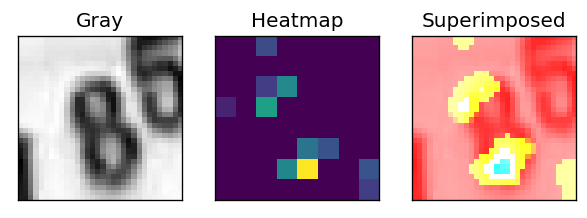

In [31]:
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step
Loading model from file
Success!
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________
No

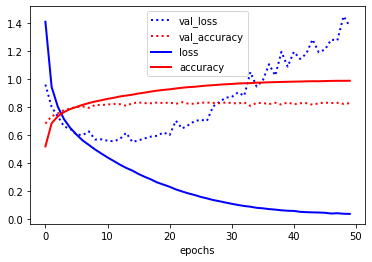

In [32]:
from keras.applications.vgg16 import VGG16
from keras import layers,  models, Sequential

preprocessed_split = X_train, X_val, y_train, y_val

def build_model_4_1():
  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  for layer in conv_base.layers:
    if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3':
      layer.trainable = True
    else:
      layer.trainable = False

  optimizer=tf.keras.optimizers.RMSprop(lr=2e-5)
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=64)
answer_q_4_1 = """
Freezing the convolution base completely performs poorly: at most 64% val.accuracy is achieved. 
It looks like features extracted from VGG16 do not work well for classification of digits in this dataset.
Unfreezing all 3 conv. layers from block5 improves val.accuracy to 83.5%, simultaneously causing very strong overfit.
Adding one Dropout layer before output layer only slightly decreases overfit.
Note, formatting of val.accuracy and accuracy on the graph is switched (unknown to me bug)."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [33]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, PowerTransformer, RobustScaler, StandardScaler
from sklearn.svm import SVC # by default, C = 1.0
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier # by default, n_estimators = 100
from sklearn.model_selection import cross_val_score

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  # Load the model:
  model = load_model_from_file(base_dir, 'model_4_1')
  # Retrieve the convolution base from the model:
  conv_base_model = model.layers[0]

  # Run train and test images through conv base:
  embeddings_train = conv_base_model.predict(X_train)
  embeddings_test = conv_base_model.predict(X_test)

  #Store the embeddings:
  store_embedding(embeddings_train, 'Train_data')
  store_embedding(embeddings_test, 'Test_data')


def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  pipeline = Pipeline([("preprocessor", Normalizer()), ("clf", SVC(kernel='rbf', random_state=1))])
  return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  score = pipeline.score(X_test, y_test)
  return score 


def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  try:
    # Load the embeddings:
    embeddings_train = load_embedding('Train_data')
    embeddings_test = load_embedding('Test_data')
  except (OSError, IOError) as e:
    print("NEED TO STORE EMBEDDINGS")
    # Store embeddings:
    store_embeddings()
    # Load the embeddings:
    embeddings_train = load_embedding('Train_data')
    embeddings_test = load_embedding('Test_data')
  
  # Transform shapes
  embeddings_train_reshaped = np.reshape(embeddings_train, (63544,512)) # (63544,1,1,512) -> (63544,512)
  embeddings_test_reshaped = np.reshape(embeddings_test, (19858,512)) # (19858,1,1,512) -> (19858,512)
  y_train_reshaped = np.argmax(y_train, axis=1) # (63544,10) -> (63544,)
  y_test_reshaped = np.argmax(y_test, axis=1) # (19858,10) -> (19858,)
  accuracy = evaluate_pipeline(generate_pipeline(), embeddings_train_reshaped, y_train_reshaped, embeddings_test_reshaped, y_test_reshaped)
  return accuracy

# Acc. with Normalizer and SVC(C=10) is 83.50%.
# Acc. with PowerTransformer and SVC(C=10) is 83.508%.
# Acc. with RobustScaler and SVC(C=10) is 83.301%.
# Acc. with StandardScaler and SVC(C=10) is 83.392%. 
# Acc. with Normalizer and KNeighborsClassifier is 83.714%.
# Acc. with Normalizer and SVC(kernel='rbf', random_state=1) is 83.487%.

answer_q_4_2 = """
In a pipeline I tried different combinations of preprocessors (Normalizer,PowerTransformer,RobustScaler,StandardScaler)
and classifiers (SVC,KNeighborsClassifier,LogisticRegression). Accuracy that all of them on the test data
was very similar, just over 83% in all cases. This result is similar to model_4_1(the source of the conv.base).
So far the best result was achieved by convnet model_2_1 without data augmentation, with 95.4% val.accuracy.
I was not able to beat this result after."""

print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('preprocessor', Normalizer(copy=True, norm='l2')),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 489 characters long


In [35]:
# Run evaluation: 
accuracy = evaluation_4_2(X_train, y_train, X_test, y_test)
print('Pipeline score on the test data: ', accuracy)

Pipeline score on the test data:  0.8348776311813878


In [32]:
!python3 drive/My\ Drive/Web_Info_Retrieval/assignment-3-KarinaMankevic/verify.py

Converting: drive/My Drive/Web_Info_Retrieval/assignment-3-KarinaMankevic/Assignment 3.ipynb
Running notebook... (may take a while)
/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
tcmalloc: large alloc 2440167424 bytes == 0x70b2000 @  0x7faaac8f01e7 0x5929fc 0x4ce180 0x567322 0x5a5611 0x4de436 0x4e00e8 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x5167b9
tcmalloc: large alloc 2440134656 bytes == 0x987d2000 @  0x7faaac8f01e7 0x5929fc 0x5eb636 0x4df2b7 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x50